# Selling Price prediction for Cars
> ### Abhishek Pandey | [LinkedIn](https://www.linkedin.com/in/abhishekpandeyit/) | [Twitter](https://twitter.com/itsme_abhi_)

## Introduction:
> I obtained this dataset from [Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho), This dataset contains information about used cars listed on a Car selling website [Cardekho.com](www.cardekho.com).

> Using this dataset I am going to perform the selling price prediction for the cars based on the data available. I'll use RandomForest Ensemble to do this prediction.

## Python Libraries Used:

In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For Numerical Analysis
import matplotlib.pyplot as plt # For Data Visualisation
import seaborn as sns # For attractive and informative graphics

## Data Wrangling and Analysis

In [2]:
""" Reading Data Set and storing in the Dataframe 'df' """

df=pd.read_csv('dataset.csv')

In [3]:
df.head(3) # Looking for first 3 rows of the Dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [4]:
'''Looking for number of rows and columns'''
print(f'Number of Rows : {df.shape[0]} \n Number of Columns : {df.shape[1]}')

Number of Rows : 301 
 Number of Columns : 9


In [5]:
df.columns #Looking for all the columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
# Checking for unique values

columns=["Car_Name","Year","Selling_Price","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]
for title in columns:
    print(f"{title}: \n {df[title].unique()} \n\n")

Car_Name: 
 ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 

In [7]:
#Checking for null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Checking for general stats

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
'''Introducing a new column to the data set as "Current_Year" and "No_Year" by substracting Year from Current Year Column '''

df['Current_Year']=2020

df["No_Year"]= df["Current_Year"]-df['Year']

In [11]:
# Checking for all the changes.

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [12]:
'''droping all unwanted columns from the dataset, 
but first creating a copy of the dataset to prevent the dataloss which may occur'''
wrangled_df=df
wrangled_df.drop(["Year", "Car_Name", "Current_Year"], axis=1, inplace=True)

In [13]:
#Confirming Changes
wrangled_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Model Training and Deployment

In [15]:
# Converting categorical values into binary indicator values(0/1) using get_dummies function of pandas.
wrangled_df=pd.get_dummies(wrangled_df, drop_first=True)

In [17]:
#Confirming Changes so that we can move ahead.
wrangled_df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


In [18]:
#Finding correlation between columns for a better analysis

wrangled_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


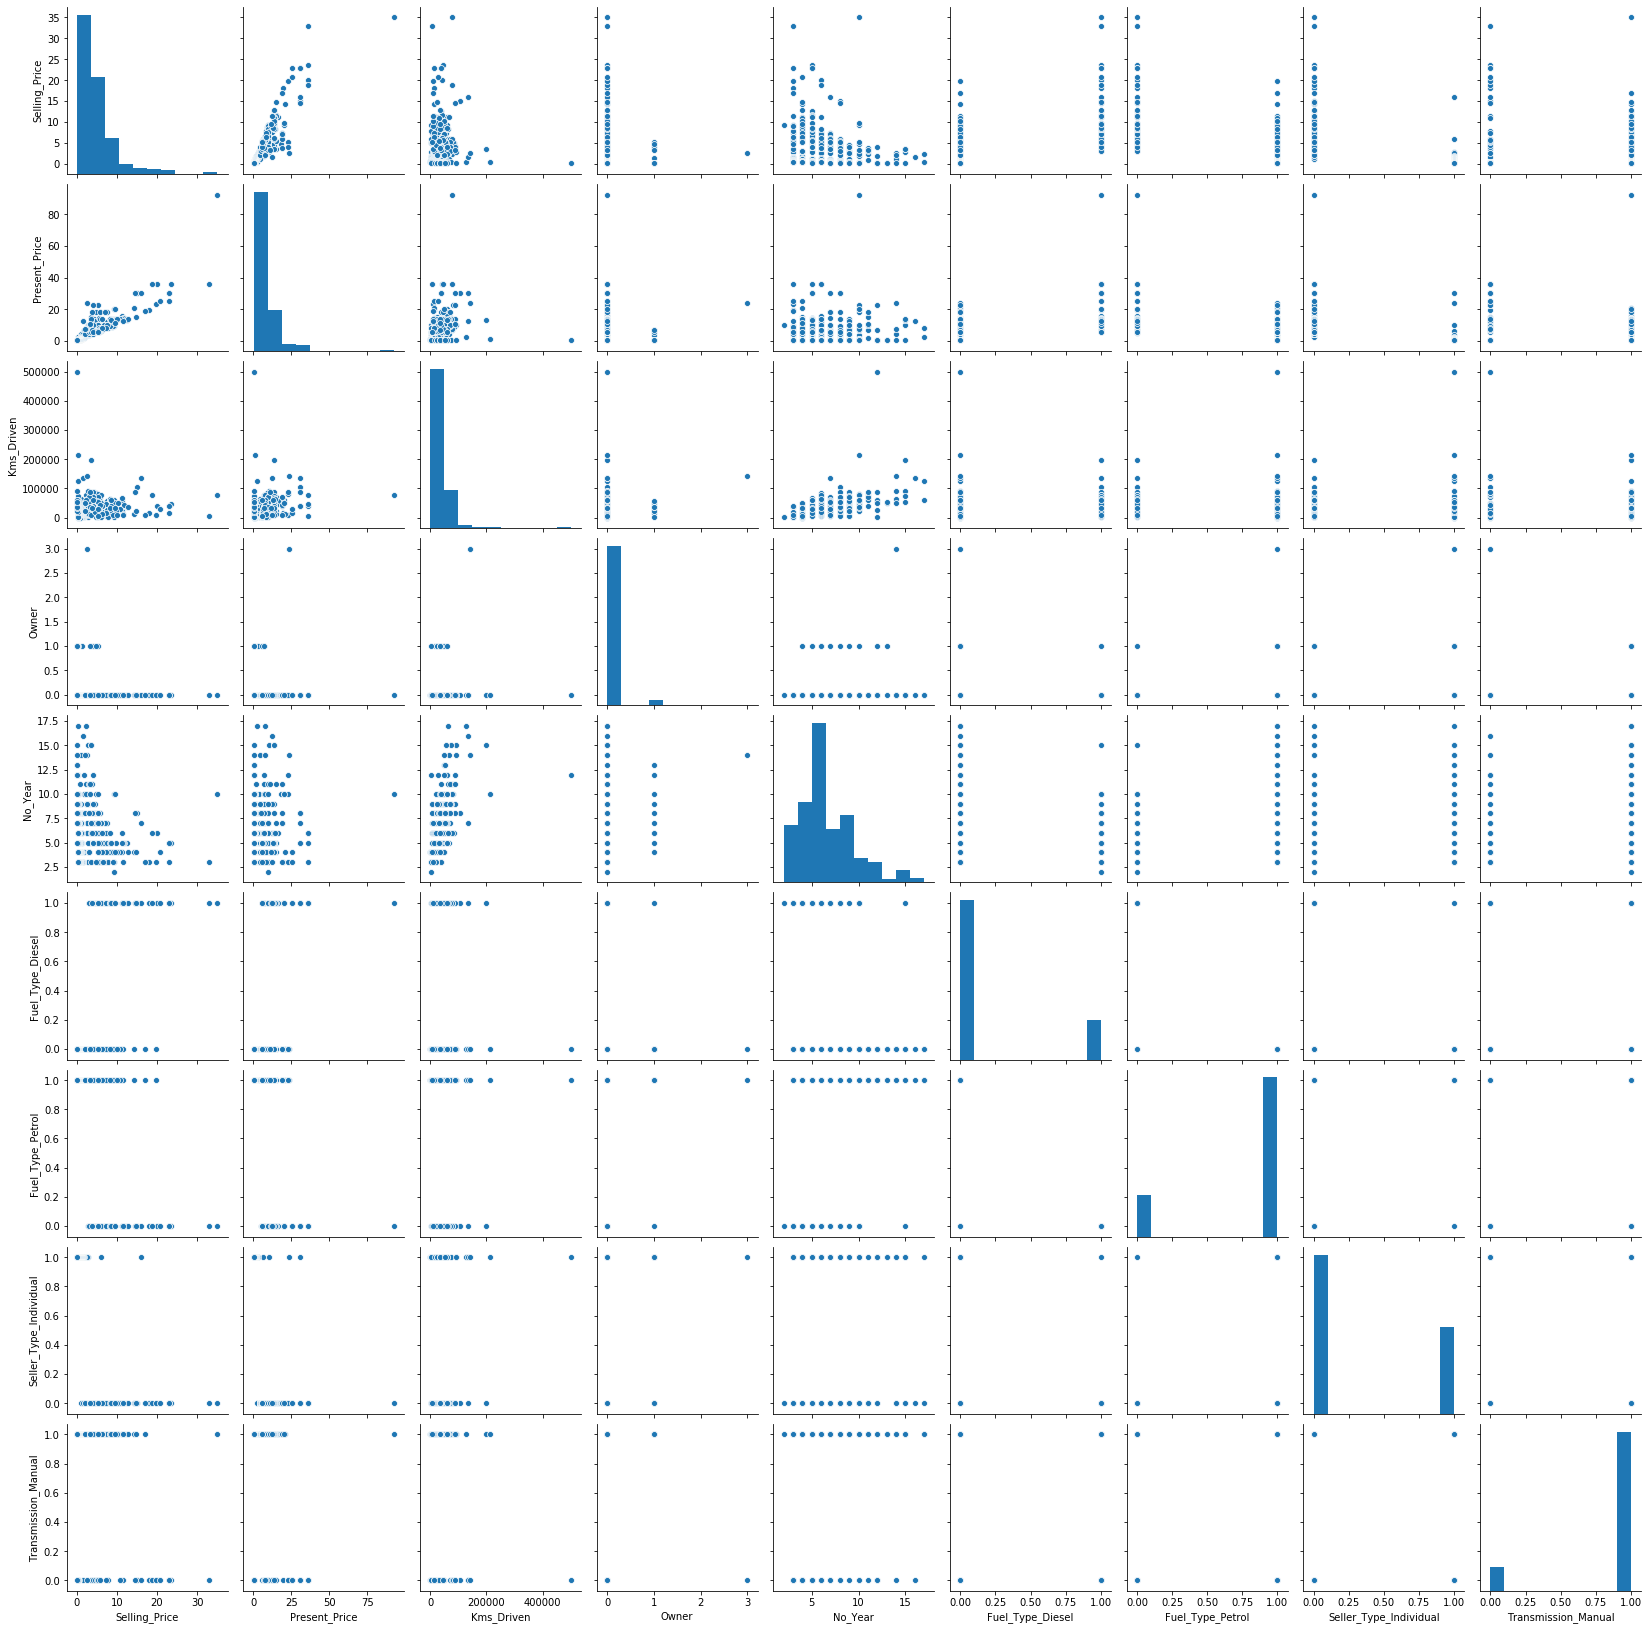

In [19]:
# Using paiplot for a better graphical visualisation of correlation
sns.pairplot(wrangled_df);

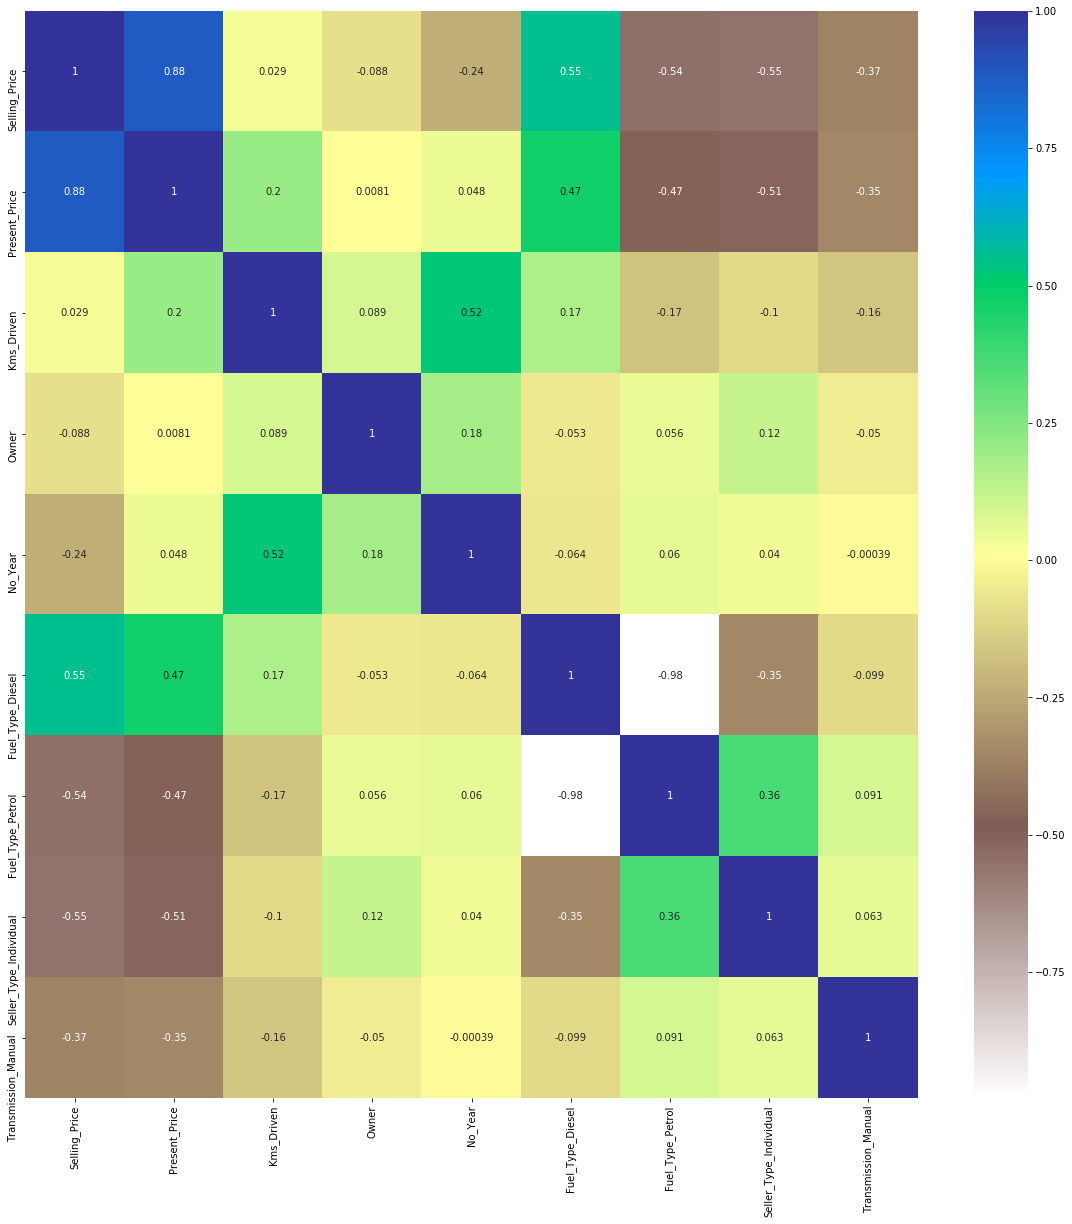

In [21]:
# Generating a Heatmap for visualisation for top correlation features between columns.
corrmat=wrangled_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(wrangled_df[top_corr_features].corr(), annot=True,cmap="terrain_r");

In [22]:
#Creating dependent and independent features
x=wrangled_df.iloc[:,1:] # All columns starting from index 1
y=wrangled_df.iloc[:,0] # Column at index 0

In [23]:
x.head(1)

,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1


In [25]:
y.head(1)

0    3.35
Name: Selling_Price, dtype: float64

In [26]:
# Using ExtraTreesRegressor and ensemble of Sklearn Python library for feature importance

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [27]:
print(model.feature_importances_)

[0.39320248 0.0426245  0.00083982 0.07343445 0.23337648 0.00404212
 0.11656939 0.13591076]


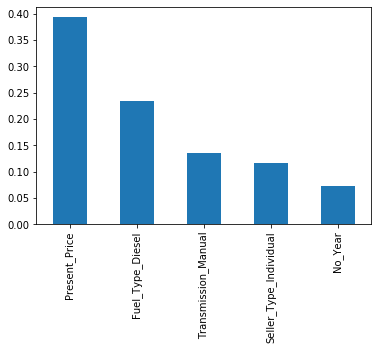

In [29]:
# Plotting graph of feature_importances_ for better Visualisation.

feat_importances =pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind= "bar")
plt.show();

In [30]:
# creating Test-train model for x and y using Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
x_train

,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
164,0.54,14000,0,4,0,1,1,1
148,0.94,45000,0,10,0,1,1,1
290,6.40,19000,0,6,0,1,0,1
90,18.61,62000,0,11,0,1,0,1
95,18.61,72000,0,8,0,1,0,1
...,...,...,...,...,...,...,...,...
21,5.71,2400,0,3,0,1,0,1
70,6.76,71000,0,6,1,0,0,1
120,1.26,5700,0,4,0,1,1,1
154,0.88,8000,0,6,0,1,1,1


In [32]:
# IMporting Random Forest Reagressor 

from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [33]:
#Hyperparameters for the model

import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
from sklearn.model_selection import RandomizedSearchCV # importing RandomizedSearchCV

In [36]:
#RandomizedSearchCV
#Number of trees in RandomForest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of Features to consider at every split
max_features=['auto','sqrt']
# Maximum numbers of levels in trees
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
# max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split =[2,5,10,15,100]
# Minimum number of samples required at each left node
min_samples_leaf=[1,2,5,10]

In [37]:
# Create random grid
random_grid={"n_estimators" : n_estimators,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
     "max_features":max_features,
    }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [38]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [39]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [40]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_sampl

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [42]:
rf_random.best_score_

-1.9876256240134702

In [43]:
predictions=rf_random.predict(x_test)

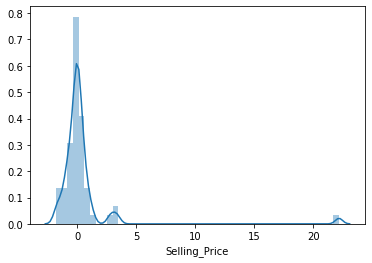

In [45]:
sns.distplot(y_test-predictions);

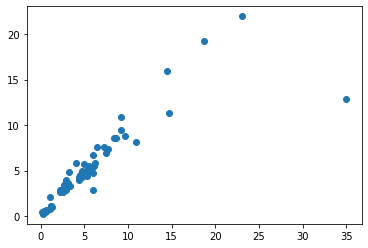

In [46]:
plt.scatter(y_test,predictions);

In [47]:
from sklearn import metrics # Importing metrics to measure classification performance

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.967475409836066
MSE: 8.948431716724638
RMSE: 2.991392939204851


In [49]:
# Generating a Pickle File for model deployment

import pickle
# opening a file, to store the data
file = open('RandomForestModel.pkl', 'wb')

# Dumping information to the file
pickle.dump(rf_random, file)